# Topology Discovery Algorithm for ER Random Graphs using Lossless Universal Compression
## Know-Your-Neighbour(KYN) Algorithm

<p> This a distributed neighbour discovery approach where each node participates in topology discovery (TD). The following steps are involved:

* Each node initiates the discovery process by listing its neighbours forming several sub-graphs
* The nodes update their lists by adding the edge lists from their neighbours. This recursive process of updating sub-graphs continues until all the nodes in the graph are covered.
    
<p> The discovery of neighbours, and with the connectivity information, topology discovery is completed. All the nodes will have information about the entire topology.
<p> The node/ edge lists are encoded and decoded using the LZ77 compression scheme in the lossless case.

The first function produces the binomial operation that results to $\binom{n}{k}$

In [1]:
import math
def binom(n,k):
    return math.factorial(n)// math.factorial(k)// math.factorial(n-k)

Number of nodes, n = 7
Edge probability, p = .8


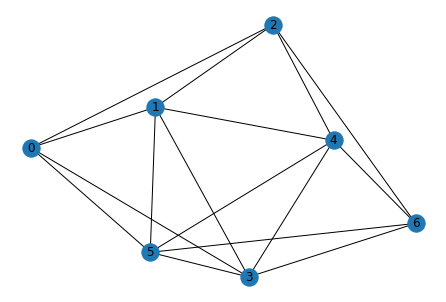

True

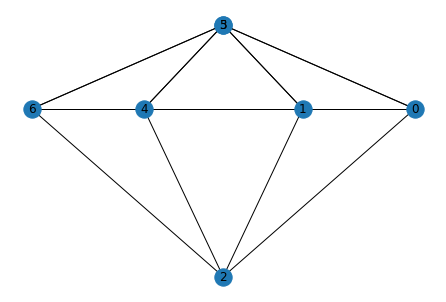

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import math

n = int(input('Number of nodes, n = ')) 
 #k = int(input('Number of edges, k = ')) 
possibleEdges = binom(n,2)
#possibleGraphs = binom(possibleEdges,k) 
#m = print('Possible number of graphs = ',possibleGraphs)  #No of possible k-connected ER graphs 

p = float(input('Edge probability, p = ')) 

G= nx.erdos_renyi_graph(n,p)
nx.draw(G, with_labels=True)
plt.show()
nx.draw_spectral(G, with_labels=True)
nx.is_connected(G)

In [3]:
def stage1_better(G):
    my_graph = G.adj
    print(type(my_graph))
    new_dict = {}
    list_set = []
    for node in my_graph:
        for n in dict(my_graph[node]):
            if {node, n} not in list_set:
                if node not in new_dict:
                    new_dict[node] = [n]
                else:
                    new_dict[node].append(n)
                list_set.append({node, n})
    return new_dict

def stage1(G):
    my_graph = G.adj
    print(type(my_graph))
    new_dict = {}
    for node in my_graph:
        print(node, ': ', [n for n in dict(my_graph[node])])
        new_dict[node] = [n for n in dict(my_graph[node])]
    return new_dict 

def display_dict(the_dict):
    for node in the_dict:
        print(node, ': ', the_dict[node])
        
       
print(stage1_better(G))
display_dict(stage1_better(G))



<class 'networkx.classes.coreviews.AdjacencyView'>
{0: [1, 2, 3, 5], 1: [2, 3, 4, 5], 2: [4, 6], 3: [4, 5, 6], 4: [5, 6], 5: [6]}
<class 'networkx.classes.coreviews.AdjacencyView'>
0 :  [1, 2, 3, 5]
1 :  [2, 3, 4, 5]
2 :  [4, 6]
3 :  [4, 5, 6]
4 :  [5, 6]
5 :  [6]


In [4]:
def get_neighbs(k, my_dict, explored_keys=[], sol=[]):
    if k in explored_keys or my_dict[k] == []:
        return sol
    else:
        explored_keys.append(k)
        neighbs = my_dict[k]
        for n in neighbs:
            if n not in explored_keys:
                sol.append([k, n])
        for n in neighbs:
            if n not in explored_keys:
                sol = get_neighbs(n, my_dict, explored_keys, sol)

    return sol

def stage2(G):
    my_dict = stage1(G)
    final_dict = {}
    for k in my_dict:
        explored_keys = []
        connections = get_neighbs(k, my_dict, explored_keys, [])
        print(k, connections)
        final_dict[k] = connections
    return final_dict


stage2(G)

<class 'networkx.classes.coreviews.AdjacencyView'>
0 :  [1, 2, 3, 5]
1 :  [0, 2, 3, 4, 5]
2 :  [0, 1, 4, 6]
3 :  [0, 1, 4, 5, 6]
4 :  [1, 2, 3, 5, 6]
5 :  [0, 1, 3, 4, 6]
6 :  [2, 3, 4, 5]
0 [[0, 1], [0, 2], [0, 3], [0, 5], [1, 2], [1, 3], [1, 4], [1, 5], [2, 4], [2, 6], [4, 3], [4, 5], [4, 6], [3, 5], [3, 6], [5, 6]]
1 [[1, 0], [1, 2], [1, 3], [1, 4], [1, 5], [0, 2], [0, 3], [0, 5], [2, 4], [2, 6], [4, 3], [4, 5], [4, 6], [3, 5], [3, 6], [5, 6]]
2 [[2, 0], [2, 1], [2, 4], [2, 6], [0, 1], [0, 3], [0, 5], [1, 3], [1, 4], [1, 5], [3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6]]
3 [[3, 0], [3, 1], [3, 4], [3, 5], [3, 6], [0, 1], [0, 2], [0, 5], [1, 2], [1, 4], [1, 5], [2, 4], [2, 6], [4, 5], [4, 6], [5, 6]]
4 [[4, 1], [4, 2], [4, 3], [4, 5], [4, 6], [1, 0], [1, 2], [1, 3], [1, 5], [0, 2], [0, 3], [0, 5], [2, 6], [6, 3], [6, 5], [3, 5]]
5 [[5, 0], [5, 1], [5, 3], [5, 4], [5, 6], [0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [1, 4], [2, 4], [2, 6], [4, 3], [4, 6], [3, 6]]
6 [[6, 2], [6, 3], [6, 4]

{0: [[0, 1],
  [0, 2],
  [0, 3],
  [0, 5],
  [1, 2],
  [1, 3],
  [1, 4],
  [1, 5],
  [2, 4],
  [2, 6],
  [4, 3],
  [4, 5],
  [4, 6],
  [3, 5],
  [3, 6],
  [5, 6]],
 1: [[1, 0],
  [1, 2],
  [1, 3],
  [1, 4],
  [1, 5],
  [0, 2],
  [0, 3],
  [0, 5],
  [2, 4],
  [2, 6],
  [4, 3],
  [4, 5],
  [4, 6],
  [3, 5],
  [3, 6],
  [5, 6]],
 2: [[2, 0],
  [2, 1],
  [2, 4],
  [2, 6],
  [0, 1],
  [0, 3],
  [0, 5],
  [1, 3],
  [1, 4],
  [1, 5],
  [3, 4],
  [3, 5],
  [3, 6],
  [4, 5],
  [4, 6],
  [5, 6]],
 3: [[3, 0],
  [3, 1],
  [3, 4],
  [3, 5],
  [3, 6],
  [0, 1],
  [0, 2],
  [0, 5],
  [1, 2],
  [1, 4],
  [1, 5],
  [2, 4],
  [2, 6],
  [4, 5],
  [4, 6],
  [5, 6]],
 4: [[4, 1],
  [4, 2],
  [4, 3],
  [4, 5],
  [4, 6],
  [1, 0],
  [1, 2],
  [1, 3],
  [1, 5],
  [0, 2],
  [0, 3],
  [0, 5],
  [2, 6],
  [6, 3],
  [6, 5],
  [3, 5]],
 5: [[5, 0],
  [5, 1],
  [5, 3],
  [5, 4],
  [5, 6],
  [0, 1],
  [0, 2],
  [0, 3],
  [1, 2],
  [1, 3],
  [1, 4],
  [2, 4],
  [2, 6],
  [4, 3],
  [4, 6],
  [3, 6]],
 6: [[6, 2],
  [